In [10]:
import sys
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [13]:
sys.path.append(os.path.abspath(".."))  

In [14]:
# Importing and preprocessing & grid search function
from scripts.data_preprocessing_script import preprocess_data
from scripts.model_validation import perform_grid_search
import joblib

In [15]:
# Data file source
data_source = '/Users/sawlehaanwaar/Documents/GitHub/life_expectancy_prediction_ml_model/data/raw/life_expectancy_data.csv'

In [16]:
if not os.path.exists(data_source):
    raise FileNotFoundError(f"Data source file not found at: {data_source}")
else:
    print(f"File exists at: {data_source}")

File exists at: /Users/sawlehaanwaar/Documents/GitHub/life_expectancy_prediction_ml_model/data/raw/life_expectancy_data.csv


In [17]:
# Preprocessing the data
print("Preprocessing the data...")

df_processed = preprocess_data(data_source)

print(f"Preprocessed data shape: {df_processed.shape}")

Preprocessing the data...
Data loaded: (2938, 22)
Step 1: Clean column names - done
Step 2: Convert column names to lowercase - done
Step 3: Encode categorical variables - done
Step 4: Impute missing values - done
Step 5: Transform skewed data - done
Step 6: Cap outliers - done
Step 7: Winsorize 'Percentage expenditure' - done
Preprocessing complete.
Preprocessed data shape: (2938, 22)


In [7]:
# Performing hyperparameter tuning using GridSearchCV
best_lasso_model, scaler, X_test_scaled, y_test, y_pred = perform_grid_search(df_processed)

Grid search started...
Data shape: (2938, 22)
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.255e+03, tolerance: 1.644e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.621e+03, tolerance: 1.669e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e+03, toler

Best parameters:  {'alpha': 0.0001}
Best cross-validation score (MSE):  12.49116965672636
Test Mean Absolute Error: 2.5670103329651104
Test Mean Squared Error: 11.388725444153526
Test Root Mean Squared Error: 3.374718572585502
Test R-squared: 0.867310883932884


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.711e+03, tolerance: 2.108e+01
  model = cd_fast.enet_coordinate_descent(


In [8]:
# Analyzing results
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual values: {y_test[:5].values}")

First 5 predictions: [69.60969704 78.39470541 75.98167369 77.34706763 44.11482837]
First 5 actual values: [73.7 75.9 74.2 76.8 51.9]


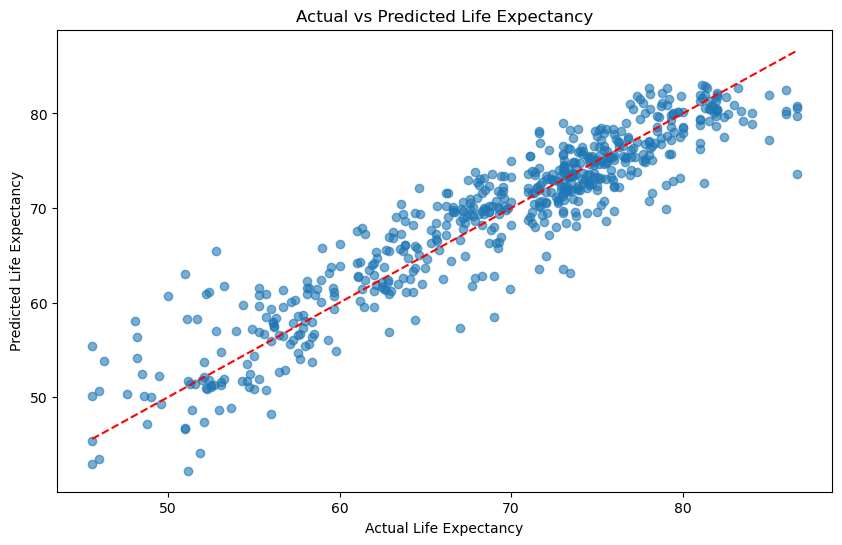

In [9]:
# Visual of model performance of best_lasso_model Predicted data vs Actual data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

In [25]:
# Saving best model for deployment
joblib.dump(best_lasso_model, 'best_lasso_model.pkl')

['best_lasso_model.pkl']